In [145]:
import matplotlib
import pandas as pd
import numpy as np

In [146]:
NEWCOMERS_JSON = './data/newcomers.json'
newcomers = pd.read_json(NEWCOMERS_JSON)
newcomers['reveal_date'] = pd.to_datetime(newcomers['reveal_date'])

In [147]:
HEADERS = ['week', 'popularity']

def calculate_popularity_diff(newcomer):
    df = pd.read_csv(
        newcomer['popularity_file'],
        names = HEADERS,
        skiprows = 3
    )
    df['week'] = pd.to_datetime(df['week'])
    
    before = df[df['week'] < newcomer['reveal_date']]['popularity'].mean()
    after = df[df['week'] >= newcomer['reveal_date']]['popularity'].mean()
    
    return after - before
    

newcomers['popularity_gain'] = newcomers.apply(
    lambda x: calculate_popularity_diff(x),
    axis=1
)
newcomers = newcomers.round(1)

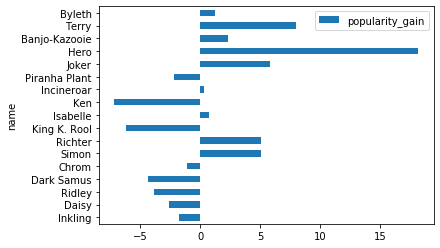

In [148]:
newcomers.plot.barh(x='name', y='popularity_gain', rot=0)

In [150]:
OUTPUT = './output/popularity_gains.csv'
COLUMNS = ['name', 'series', 'popularity_gain']
newcomers.to_csv(OUTPUT, columns=COLUMNS)